### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 2: Predicting outcomes using classification and clustering

This week we will continue to learn about more different types of machine learning algorithms (classification and clustering) used in predictive analytics to analyse business trends and patterns to obtain meaningful business insights. We will also learn about the available Python tools that enable analysts to automate these tasks. Python libraries, such as Pandas, Matplotlib and Seaborn, can provide the tools to help businesses predict trends and make decisions. 

In addition, we will learn how to use these Python tools to create and test classification models, which are useful for analysing categorical data such as product types and customer segments. We will then continue to build on our knowledge of regression analysis techniques by learning how to use binary logistical regression, multinomial logistical regression, and support vector machines.

This is your notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

# 2.1 Classification with Python

## Binary logistic regression (BLR)

### 1. Import and read the data set

In [1]:
# Import all necessary packages.
import numpy as np
import pandas as pd

# Read the data file.
df = pd.read_csv("Customer_data.csv")

# Print the DataFrame.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


### 2. Determine the data types of each column

In [2]:
# Find the data types of columns (e.g. replace strings with single
# words or round numeric values to a specific number of decimals).
df.dtypes

Age                int64
Occupation        object
Status            object
Edu               object
House             object
Loan              object
Comm              object
Month             object
DOW               object
Duration           int64
Campaign           int64
PosDays            int64
Last_out          object
Var_rate         float64
Price_idx        float64
Conf_idx         float64
Month_rate       float64
Quarterly_emp    float64
Target             int64
dtype: object

### 3. Determine the shape of the data set

In [3]:
# Determine the shape of the data set (one of the assumptions to 
# be met for logistic regression is a large data set).
df.shape

(41188, 19)

### 4. Check for missing values

In [4]:
# Determine missing values, column names, shape of data set, and data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

### 4. Determine object containing counts of unique values

In [5]:
# Specify the DataFrame and column & add/determine the values.
df['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

### 5. Update the categories in the 'Edu' column

In [6]:
# Specify the DataFrame and column name,
# Specify the DataFrame and the column name that contains
# the string to be changed
# Specify the word to be changed that the string contains
# and the new name:

df.loc[df['Edu'].str.contains('basic'), 'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('university'), 'Edu'] = 'uni'
df.loc[df['Edu'].str.contains('high'), 'Edu'] = 'high-school'
df.loc[df['Edu'].str.contains('professional'), 'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('unknown'), 'Edu'] = 'other'

# Display all the unique values/check changes.
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [7]:
df['Edu'].value_counts()

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

### 6. Create dummy variables

In [8]:
# [1] Name new DataFrame and convert categorical variables to dummy variables:
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# [2] Use the for loop keyword to specify what actions to apply to
# all the 'var' items:
# [2a] Specify what needs to apply to all the variables:
for var in cat_vars:
    cat_list = 'var' + '_' + var
    # [2b] Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix = var)
    # [2c, 3] Indicate the joining of the DataFrames.
    cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan',
               'Comm', 'Month', 'DOW', 'Last_out']
# [4] Set a temporary DataFrame and add values.
df_vars = df.columns.values.tolist()
# [5] Indicate what columns are kept.
to_keep = [i for i in df_vars if i not in cat_vars]

# [6] Define new DataFrame.
df_fin = df[to_keep]

# [7] Print the column.
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target'], dtype=object)

### 7. Balance the data

In [9]:
# Determine if values in a column are balanced.
df['Target'].value_counts()

0    36548
1     4640
Name: Target, dtype: int64

In [10]:
# Handles unbalanced data (scikit-learn needed).
!pip install imblearn
# Optimised linear, algebra and integrations (scientific).
!pip install scipy
# Simple tools for predictive data analytics.
!pip install scikit-learn
# Oversampling technique; creates new samples from data.
!pip install SMOTE

In [11]:
# [1] Import all the ncessary packages:
# [1a] Assists with providing classes and functions
# to estimate many different statistical methods.
import statsmodels.api as sm
import imblearn
# [1b] Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# [1c] Indicates situations that aren't necassarily exceptions.
import warnings
warnings.filterwarnings("ignore")

In [8]:
# [2] Create the DataFrame to use as df_fin and replace
# missing values with zero.
df_fin = df_fin.fillna(0)

# [3]Specify the variables:
X = df_fin.loc[:, df_fin.columns != 'Target']
y = df_fin.loc[:, df_fin.columns == 'Target']

# [4] Create a new DataFrame and
# [4a] Apply SMOTE function as the target variable is not balanced.
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 0)
# [5] Specify column values.
columns = X_train.columns
# [6] Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# [7] Create two DataFrames for X and y:
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# [8] Print the DataFrame.
print('Length of oversampled data is', len(os_data_X))
os_data_y

Length of oversampled data is 51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [13]:
# Determine if values in a column are balanced by counting the values:
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

### Apply VIF to check multicollinearity

In [14]:
# [1] Select all the numeric columns.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# [2] Create a DataFrame to contain the numeric columns.
df_num = df.select_dtypes(include = numerics)

# View the DataFrame.
print(df_num.head())

# [3] Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# [4] Create a VIF DataFrame.
vif_data = pd.DataFrame()
vif_data['feature'] = df_num.columns

# [5] Calculate the VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i)
                  for i in range(len(df_num.columns))]

# [6] View the output.
vif_data

   Age  Duration  Campaign  PosDays  Var_rate  Price_idx  Conf_idx  \
0   44       210         1      999       1.4     93.444     -36.1   
1   53       138         1      999      -0.1     93.200     -42.0   
2   28       339         3        6      -1.7     94.055     -39.8   
3   39       185         2      999      -1.8     93.075     -47.1   
4   55       137         1        3      -2.9     92.201     -31.4   

   Month_rate  Quarterly_emp  Target  
0       4.963         5228.1       0  
1       4.021         5195.8       0  
2       0.729         4991.6       1  
3       1.405         5099.1       0  
4       0.869         5076.2       1  


,feature,VIF
0,Age,16.045844
1,Duration,2.444768
2,Campaign,1.921042
3,PosDays,34.949748
4,Var_rate,28.952264
5,Price_idx,22554.990597
6,Conf_idx,120.794996
7,Month_rate,225.576222
8,Quarterly_emp,26802.864918
9,Target,1.662161


In [15]:
# Test correlations.
_correlations = df_num.corr()

# View output.
_correlations

,Age,Duration,Campaign,PosDays,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
Age,1.000000,-0.000866,0.004594,-0.034369,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
Duration,-0.000866,1.000000,-0.071699,-0.047577,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
Campaign,0.004594,-0.071699,1.000000,0.052584,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
PosDays,-0.034369,-0.047577,0.052584,1.000000,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
Var_rate,-0.000371,-0.027968,0.150754,0.271004,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
Price_idx,0.000857,0.005312,0.127836,0.078889,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
Conf_idx,0.129372,-0.008173,-0.013733,-0.091342,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
Month_rate,0.010767,-0.032897,0.135133,0.296899,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
Quarterly_emp,-0.017725,-0.044703,0.144095,0.372605,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
Target,0.030399,0.405274,-0.066357,-0.324914,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


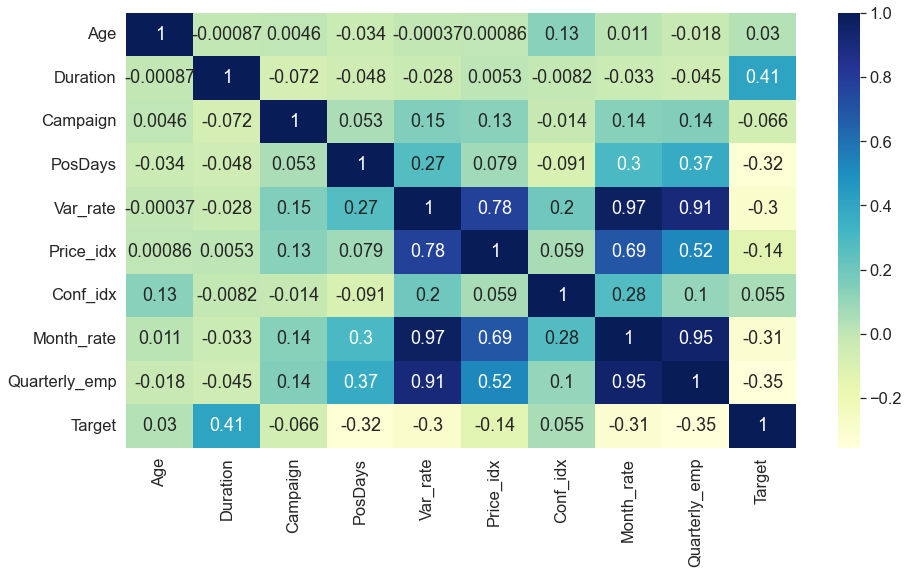

In [16]:
# Visualise the correlation.
import seaborn as sns

# Set fig and font size.
sns.set(rc = {'figure.figsize': (15, 8)})
sns.set(font_scale = 1.5)

# Plot heatmap.
dataplot = sns.heatmap(_correlations, cmap = 'YlGnBu', annot = True)

### Box-Tidwell test

In [17]:
# [1] Import necessary libraries, modules, classes and packages.
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# [2] Select all the continuous variables.
continuous_vars = list(df_num.columns[:-1])

# [3] Make a copy of the DataFrame.
df_test = df.copy()

# [4] Add logit transform interaction terms (natural log) for
# continuous variables e.g.. Age * Log(Age).
for var in continuous_vars:
    df_test[f'{var}:Log_{var}'] = df_test[var].apply(lambda x: x * np.log(x))
    
    # [5] Keep columns related to continuous variables.
    cols_to_keep = continuous_vars + [_ for _ in df_test.columns if 'Log_' in _]
    
# [6] View output.
list(cols_to_keep)

['Age',
 'Duration',
 'Campaign',
 'PosDays',
 'Var_rate',
 'Price_idx',
 'Conf_idx',
 'Month_rate',
 'Quarterly_emp',
 'Age:Log_Age',
 'Duration:Log_Duration',
 'Campaign:Log_Campaign',
 'PosDays:Log_PosDays',
 'Var_rate:Log_Var_rate',
 'Price_idx:Log_Price_idx',
 'Conf_idx:Log_Conf_idx',
 'Month_rate:Log_Month_rate',
 'Quarterly_emp:Log_Quarterly_emp']

In [18]:
# Redefining variables to include interaction terms
# [1] Replace missing values with 0
X_lt = df_test[cols_to_keep].fillna(0)

# [2] Add constant term.
X_lt_constant = sm.add_constant(X_lt, prepend = False)

# [3] Building the model and fit the data (using statsmodel's Logit)
logit_results = GLM(y, X_lt_constant, family = families.Binomial()).fit()

# [4] Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                41188
Model:                            GLM   Df Residuals:                    41170
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8371.3
Date:                Tue, 24 May 2022   Deviance:                       16743.
Time:                        01:16:17   Pearson chi2:                 2.71e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age       

In [19]:
# [1] Use the model you created.
logit_results = GLM(y, X_lt, family = families.Binomial()).fit()
predicted = logit_results.predict(X_lt)

# [2] Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# [3] View output.
log_odds

0       -4.149033
1       -4.578973
2        1.604549
3       -3.022360
4       -0.859085
           ...   
41183   -3.752689
41184   -4.509934
41185   -6.252305
41186   -0.622407
41187   -5.234703
Length: 41188, dtype: float64

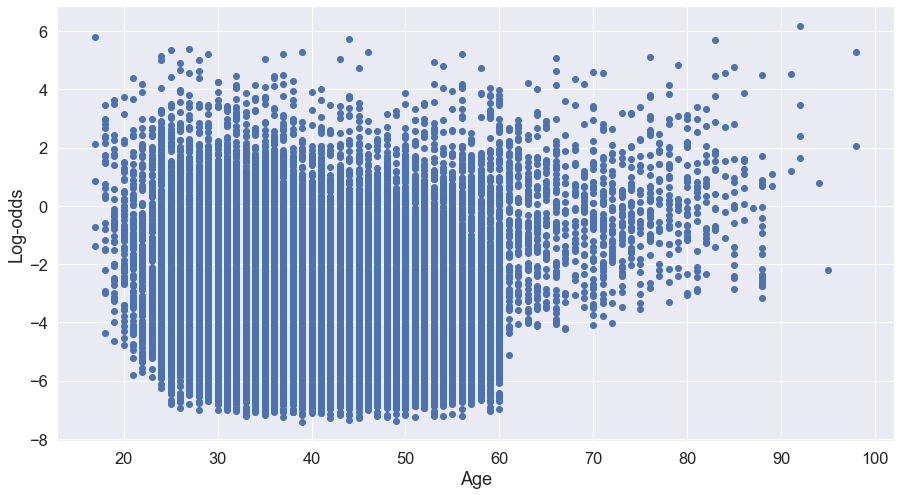

In [20]:
import matplotlib.pyplot as plt

def vis_var(varname):
    # Visualise predictor variable vs logit values for Age.
    plt.scatter(x = X_lt[varname].values, y = log_odds)
    plt.xlabel(varname)
    plt.ylabel('Log-odds')
    plt.show()
    
# Look at one that is not libearly related to the log odds.
vis_var('Age')

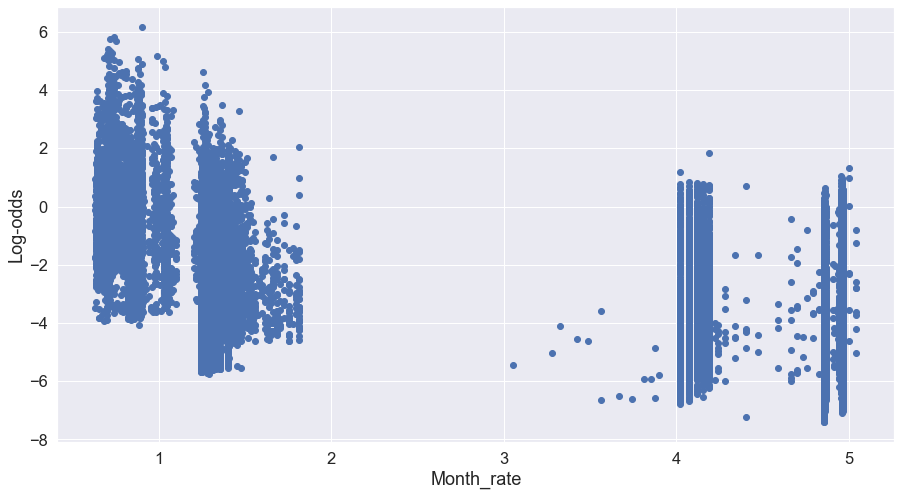

In [21]:
# Look at one that is linearly related to the log oods.
vis_var('Month_rate')

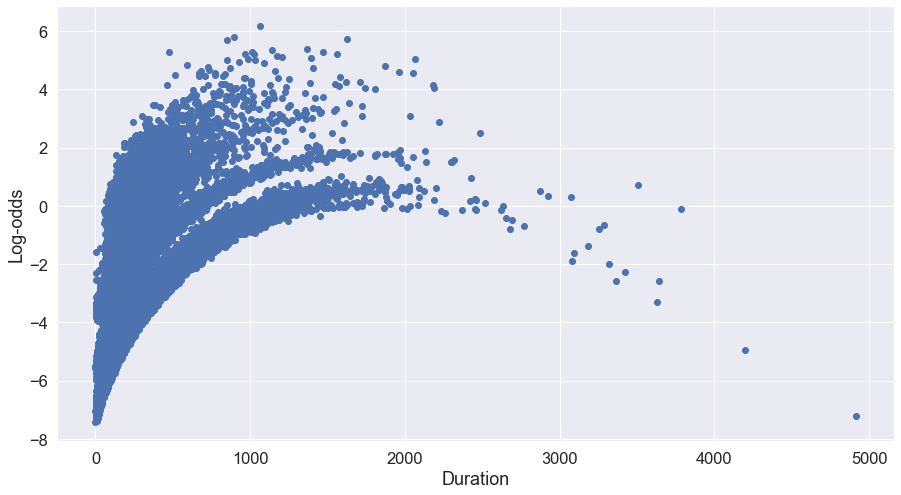

In [22]:
vis_var('Duration')

### Recursive feature elimination (RFE)

In [9]:
# Resursive feature elimination:
# [1] Create a new DataFrame.
data_final_vars = df_fin.columns.values.tolist()

# [2] Set the variables:
y = ['Target']
X = [i for i in data_final_vars if i not in y]

# [3] Import two packages from sklearn:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# [4] Indicate 'logreg' equals 'LogisticRegression()'.
logreg = LogisticRegression()

# [5] Specify 'rfe' value and no. of features.
rfe = RFE(logreg)

# [6] Indicate the fit with 'fit()'.
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

# [7] Print the two rfes:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True  True
  True False False False  True False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
  True  True  True  True  True  True  True False]
[28 26 27 29 22 21 24 20 25  5  1  1  1  4  9  3  1  8  2  7  6  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 14 10 16 12 15 19 13 11 18 17
  1  1  1  1  1  1  1 23]


#### Selecting necessary columns for BLR

In [13]:
# [1] Name the new DataFrame and [2] specify all the columns for BLR:
nec_cols = ['Status_divorced', 'Status_married', 'Status_single',
            'Status_unknown', 'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 'Edu_uni', 'House_no',
            'House_unknown', 'House_yes', 'Loan_no', 'Loan_unknown',
            'Loan_yes', 'DOW_fri', 'DOW_mon']

# [3a] Set the independent variable.
X = os_data_X[nec_cols]

# [3b] Set the dependent variable.
y = os_data_y['Target']

# [4] Set the logit() to accept y and x as parameters and return the logit object:
logit_model = sm.Logit(y, X)

# [5] Indicate result = logit_model.fit() function.
result = logit_model.fit()

# [6] Print the results.
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.518392
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.252     
Dependent Variable:                 Target                         AIC:                            53046.8804
Date:                               2022-05-24 18:57               BIC:                            53188.3557
No. Observations:                   51134                          Log-Likelihood:                 -26507.   
Df Model:                           15                             LL-Null:                        -35443.   
Df Residuals:                       51118                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

### Checking BLR accuracy

In [14]:
# [1] Import neceassary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# [2] Split X and y data sets into 'train' and 'test' in a 30 : 70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 0)

# [2a] Set LogisticRegression() to 'logreg'.
logreg = LogisticRegression()

# [2b] Fit the X_train and y_train data sets to logreg.
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


### Using confusion matrix to determine classification accuracy

In [16]:
# Create the confusion matrix to test classification accuracy in BLR:
# [1] Import the necessary package to create the confusion matrix.
from sklearn.metrics import confusion_matrix

# [2] Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)

# [3] Print the confusion matrix.
print(confusion_matrix)

[[7666    0]
 [1312 6363]]


In [17]:
# [1] Import the necessary package.
from sklearn.metrics import classification_report

# [2] Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7666
           1       1.00      0.83      0.91      7675

    accuracy                           0.91     15341
   macro avg       0.93      0.91      0.91     15341
weighted avg       0.93      0.91      0.91     15341



## Multinomial logistic regression (MLR)

### 1. Import and read the data set

In [37]:
# Import all the necessary packages: Pandas, NumPy, SciPy, Sklearn, StatsModels:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [38]:
# Upload the CSV file.
oysters = pd.read_csv("oysters.csv")

# Print the columns.
oysters.columns

Index(['sex', 'length', 'diameter', 'height', 'total_weight', 'raw_weight',
       'intestines_weight', 'shell_weight', 'age'],
      dtype='object')

In [39]:
# View the DataFrame.
oysters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB


In [40]:
# Apply the value_counts() method, and
# Assign the results to a new DataFrame:
oysters_sex = oysters['sex'].value_counts()

# Print the contents.
print(oysters_sex)

male      3561
female    3113
infant    2810
Name: sex, dtype: int64


### 2. Identifying the dependent variable column

In [41]:
# [1] Set the independent and dependent variables:
X = oysters.drop(['sex'], axis = 1)
y = oysters['sex']

# [2] Print to check 'sex' column was dropped.
print(list(X.columns.values))

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']


In [42]:
# [3] Specify the train and test subsets and
# [3a] Use 30% as the 'test_size' and a random_state of one:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(\
X, y, test_size = 0.30, random_state = 1, stratify = y)

# [4] Print the shape of all the train and tes sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6638, 8)
(2846, 8)
(6638,)
(2846,)


### 3. Build the model

In [43]:
# [1] Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler

# [2] Create a function and [2a] set values.
scaler = MinMaxScaler(feature_range = (0, 1))

# [3] Add the X_train data set to the 'scaler' function:
scaler.fit(X_train)

# [3a] Specify X_train data set.
X_train = scaler.transform(X_train)

# [3b] Specify X_test data set.
X_test = scaler.transform(X_test)

In [44]:
# [1] Define the MLR model and [1a] set predictions and parameters:
MLR = LogisticRegression(random_state = 0, multi_class = 'multinomial',
                        penalty = 'none', solver = 'newton-cg').fit(X_train, y_train)

# [2] Set the predictions equal to the 'MLR' function and
# [2a] specify the DataFrame.
preds = MLR.predict(X_test)

# [3] Set the parameters equal to the DataFrame and
# [3a] add the 'get_params' function.
params = MLR.get_params()

# [4] Print the parameters.
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [45]:
# Evaluate the MLR intercept and coefficients.
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)

Intercept: 
 [-1.84883052  1.60340814  0.24542237]
Coefficients: 
 [[ -5.81737526   5.78010805   5.4332938    5.13194904  -5.01938144
    4.32807679  -1.07708309   1.3583728 ]
 [ 10.24643826  -6.10005746  -7.87925863 -11.48779375   6.38647698
   -6.62219495   1.90516517  -3.11254823]
 [ -4.42906301   0.3199494    2.44596483   6.35584471  -1.36709554
    2.29411816  -0.82808208   1.75417543]]


### 4. Create a linear equation from the logit model

In [46]:
# [1] Name the model and [2] set model to the function:
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train))

logit_model

# [3] Specify how the function returns the results.
result = logit_model.fit()

# [4] Print the reprot as a 'result.summary()' function.
print('Summary for Sex: I/M :\n', result.summary())

Optimization terminated successfully.
         Current function value: 0.854457
         Iterations 8
Summary for Sex: I/M :
                           MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 6638
Model:                        MNLogit   Df Residuals:                     6620
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.2189
Time:                        01:41:23   Log-Likelihood:                -5671.9
converged:                       True   LL-Null:                       -7261.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
sex=infant       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4522      0.316     10.913      0.000       2.832       4.072
x1   

### 5. Check the accuracy of the model

In [47]:
# Create and print a confusion matrix:

# 'y_test' as the first argument and the predictions as the second argument:
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array
pd.DataFrame(cmatrix, index = ['female', 'infant', 'male'],
            columns = ['predicted_female', 'predicted_infant',
                      'predicted_male'])

,predicted_female,predicted_infant,predicted_male
female,314,160,460
infant,57,676,110
male,304,244,521


In [48]:
# Determine accuracy statistics:
print('Accuray score:', metrics.accuracy_score(y_test, preds))

# Create classification report:
class_report = classification_report(y_test, preds)

print(class_report)

Accuray score: 0.5309205903021785
              precision    recall  f1-score   support

      female       0.47      0.34      0.39       934
      infant       0.63      0.80      0.70       843
        male       0.48      0.49      0.48      1069

    accuracy                           0.53      2846
   macro avg       0.52      0.54      0.53      2846
weighted avg       0.52      0.53      0.52      2846



### 6. Visualise the MLR model

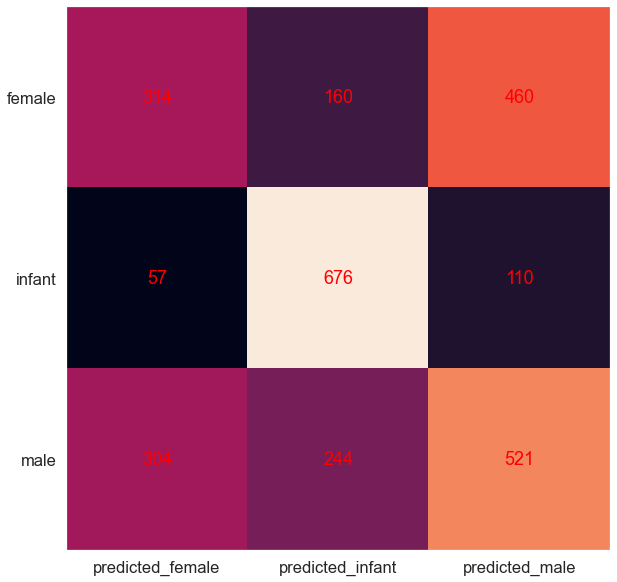

In [50]:
# [1] Improt matplotlib to create a visualisation.
import matplotlib.pyplot as plt

# [2] Define confusion matrix.
cm = confusion_matrix(y_test, preds)

# [3] Create visualisation for the MLR:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1, 2), ticklabels = ('predicted_female',
                                             'predicted_infant',
                                             'predicted_male'))
ax.yaxis.set(ticks = (0, 1, 2), ticklabels = ('female', 'infant', 'male'))

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red')
        
plt.show()

## Building an support vector machine model (SVM)

### 1. Import and read the data set

In [1]:
# [1] Import all the nceassary packages:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Note: Indicates situations that aren't necessarily exceptions.
import warnings
warnings.filterwarnings("ignore")

# [2] Read the date file with Pandas.
df = pd.read_csv("Customer_data.csv")

# [3] Sense-check the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

### 2. Clean the data

In [2]:
# Update all the details of the education column:
df.loc[df['Edu'].str.contains('basic'), 'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('university'), 'Edu'] = 'uni'
df.loc[df['Edu'].str.contains('high'), 'Edu'] = 'high-school'
df.loc[df['Edu'].str.contains('professional'), 'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('unknown'), 'Edu'] = 'other'

# Display all the unique values/check changes.
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

### 3. Create dummy variables

In [4]:
# Convert categorical variables to dummy variables:
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# Specify what needs to apply to all the variabels
for var in cat_vars:
    # Specify details of the categorical list
    cat_list = pd.get_dummies(df[var], prefix = var)
    # Indicate the joining of the DataFrames
    df1 = df.join(cat_list)
    # Set the old DataFrame with new df with dummy values
    df = df1
    
    cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# Set the temporary DataFrame and add values
df_vars = df.columns.values.tolist()
# Indicate what columns are kept
to_keep = [i for i in df_vars if i not in cat_vars]

# Define a new DataFrame
df_fin = df[to_keep]

# Print the column
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

### 4. Balance the data

In [5]:
# [1] Create the DataFrame to use as 'df_fin' and replace missing values with 0:
df_fin = df_fin.fillna(0)

In [19]:
# [2] Specify only the necessary columns for BLR:
nec_cols = ['Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

# [3a] Set the independent variable.
X = df_fin[nec_cols]

# [3b] Set the dependent variable.
y = df_fin.loc[:, df_fin.columns == 'Target']

# [4] Create a new DataFrame and
# [4a] apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 0)

# [5] Specify column values.
columns = X_train.columns

# [6] Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# [7] Create two DataFrames, one for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# [8] Print the DataFrame.
print('Length of oversampled data is ', len(os_data_X))

os_data_y

Length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [20]:
# Determine if values in a column are balanced.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

### 5. Build and apply the SVM

In [22]:
# [1] Import the 'svm' package from sklearn.
from sklearn import svm
# [2] Import the 'confusion_matrix' package.
from sklearn.metrics import confusion_matrix

# [3] Create an svm classifier using [3a] a linear kernel.
clf = svm.SVC(kernel = 'linear', gamma = 'scale')

# [4] train the model using the training sets.
clf.fit(os_data_X, os_data_y)

# [5] Predict the response for the test data set.
y_pred = clf.predict(X_test)

### 6. Check the accuracy of the model

In [23]:
# [1] Import the scikit-learn metrics module for an accuracy calculation:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Print the confusion matrix.
print(confusion_matrix(y_test, y_pred))

# [3a] Specify model accuracy: how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# [3b] Specify model precision: what percentage of
# positive tuples are labelled as such?
print('Precision:', metrics.precision_score(y_test, y_pred))

# [3c] Specify model recall: how good is the model at
# correctly predicting positive classes?
print('Recall:', metrics.recall_score(y_test, y_pred))

[[7360 3621]
 [ 789  587]]
Accuracy: 0.6431172614712308
Precision: 0.13949619771863117
Recall: 0.4265988372093023


# 

# 2.2 Decision tress with Python

## Classification decision trees

### 1. Import libraries and read data file

In [2]:
# [1] Import all necessary libraries:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
from sklearn import metrics
# Note: Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren't neceassarily exceptions.
import warnings
# [1a] Filter out any warning messages.
warnings.filterwarnings("ignore")

# [2] Read the provided CSV file.
df = pd.read_csv("Customer_data.csv")

# [3] Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

### 2. Update the variables in the 'Edu' column

In [3]:
# [1] Update all the details of the education column:
df.loc[df['Edu'].str.contains('basic'), 'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('university'), 'Edu'] = 'uni'
df.loc[df['Edu'].str.contains('high'), 'Edu'] = 'high-school'
df.loc[df['Edu'].str.contains('professional'), 'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'), 'Edu'] = 'other'
df.loc[df['Edu'].str.contains('unknown'), 'Edu'] = 'other'

# [2] Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

### 3. Create dummy variables

In [4]:
# Convert categorical variables to dummy variables:
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# Specify what needs to apply to all the variabels
for var in cat_vars:
    # Specify details of the categorical list
    cat_list = pd.get_dummies(df[var], prefix = var)
    # Indicate the joining of the DataFrames
    df1 = df.join(cat_list)
    # Set the old DataFrame with new df with dummy values
    df = df1
    
    cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# Set the temporary DataFrame and add values
df_vars = df.columns.values.tolist()
# Indicate what columns are kept
to_keep = [i for i in df_vars if i not in cat_vars]

# Define a new DataFrame
df_fin = df[to_keep]

# Print the column
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

### 4. Balance the data

In [5]:
# [1] Create a DataFrame to use as df_fin and replace missing valeus with 0.
df_fin = df_fin.fillna(0)

# [2] Select necessary columns:
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# [3] Create a new DataFrame and
# [3a] apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 0)

# [4] Specify column values.
columns = X_train.columns
# [5] Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# [6] Create two DataFrames for X and y:
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# [7] Print/check the DataFrame:
print('Length of oversampled data is ', len(os_data_X))

os_data_y

Length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [6]:
# Determine if values in a column is balanced.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

### 5. Build and apply the decision tree model

In [7]:
# [1] Import the 'DecisionTreeClassifier' class from sklearn.
from sklearn.tree import DecisionTreeClassifier

# [2] Create a classification decision tree classifier object as 'dtc':
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

# [3] Train the decision tree classifier.
dtc = dtc.fit(os_data_X, os_data_y)

# [4] Predict the response for the test data set.
y_pred = dtc.predict(X_test)

### 6. Check the accuracy of the model

In [8]:
# [1] Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# [2] Use the 'print()' function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# [3] Calculate and print:
# [3a] Metrics for 'accuracy'.
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# [3b] Metrics for 'precision'.
print('Precision:', metrics.precision_score(y_test, y_pred))
# [3c] Metrics for 'recall'.
print('Recall:', metrics.recall_score(y_test, y_pred))

[[8561 2420]
 [ 956  420]]
Accuracy: 0.726794529416525
Precision: 0.14788732394366197
Recall: 0.30523255813953487


In [9]:
# Alternate method to generate the classification report.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     10981
           1       0.15      0.31      0.20      1376

    accuracy                           0.73     12357
   macro avg       0.52      0.54      0.52     12357
weighted avg       0.82      0.73      0.76     12357



### 7. Visualise the decision tree

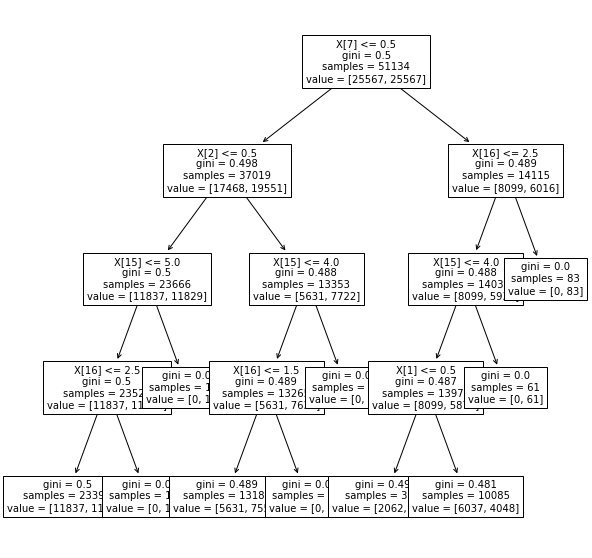

In [10]:
# [1] Import matplotlib to create a visualisation
# and the 'tree' package from sklearn:
import matplotlib.pyplot as plt
from sklearn import tree

# [2] Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize = (10, 10))
tree.plot_tree(dtc, fontsize = 10)

# [3] Print the plot with plt.show().
plt.show()

In [11]:
# Change the levels displayed on the decision tree
# by adjusting the value of max_depth:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

## Regression decision tree

### 1. Import and read the data set

In [14]:
# [1] Import all necessary libraries:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
# Note: Provides classes and functions to estimate many
#different statistical methods.
import statsmodels.api as sm  

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
# [1a] Filter out any warning messages.
warnings.filterwarnings("ignore")

# [2] Read the CSV file/data set.
df = pd.read_csv('Ecommerce data.csv')

# [3] Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


### 2. Build and fit the model

In [15]:
# [1] Specify that the column Median_s
# should be moved into a separate DataFrame.
cols = df.columns[df.columns != 'Median_s']

# [2] Specify 'X' as the independent variables
# and 'y' as the dependent variable.
X = df[cols]
y = df['Median_s']

# [3] Split the data into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 0)

# [4] Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor

# [5] Create the 'DecisionTreeRegressor' class
# (which has many parameters; input only #random_state = 0):
regressor = DecisionTreeRegressor(random_state = 0)

# [6] Fit the regressor object to the data set.
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### 3. Check the accuracy of the model

In [17]:
# [1] Import the necessary packages:
from sklearn import metrics
import math

# [2] Predict the response for the test data set.
y_pred = regressor.predict(X_test)

# [3] Specify to print the MAE and MSE (to evaluate the accuracy of the new model):
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
# [3b] Calculate the RMSE.
print('Root Mean Squared Error: ',
     math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  3.2552631578947366
Mean Squared Error:  26.397894736842108
Root Mean Squared Error:  5.137888159238395


## Classification random forest

### 1. Import and read the data set

In [2]:
# [1] Import all the ncessary packages:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings # Note: Indicates situations that aren't necessarily exceptions.
warnings.filterwarnings("ignore") # [1a] Filter out any warning messages.

In [3]:
# [2] Read the CSV file.
df = pd.read_csv("Customer_data.csv")

# [3] Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

### 2. Update the variables in the 'Edu' column

In [4]:
# [1] Update all the details of the education column:
df['Edu'][df['Edu'].str.contains('basic')] = 'pre-school'
df['Edu'][df['Edu'].str.contains('university')] = 'uni'
df['Edu'][df['Edu'].str.contains('high')] = 'high-school'
df['Edu'][df['Edu'].str.contains('professional')] = 'masters'
df['Edu'][df['Edu'].str.contains('illiterate')] = 'other'
df['Edu'][df['Edu'].str.contains('unknown')] = 'other'

# [2] Display all the unique values/check changes.
df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

### 3. Create dummy variables

In [5]:
# [1] Name new DataFrame and convert categorical variables to dummy variables:
cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# [2] Use the for loop keyword to specify whata actions to apply to all the 'var' items:
# [2a] Specify what nneds to apply to all the variables.
for var in cat_vars:
    cat_list = 'var' + '_' + var
    # [2b] Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix = var)
    # [2c] Indicate the joining of the DataFrames.
    df1 = df.join(cat_list)
    # [2d] Set the old DataFrame with new df with dummy values.
    df = df1
    
    cat_vars = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm',
           'Month', 'DOW', 'Last_out']

# [4] Set the temporary DataFrame and add values.
df_vars = df.columns.values.tolist()
# [5] Indicate what columns are kept.
to_keep = [i for i in df_vars if i not in cat_vars]

# [6] Define a new DataFrame.
df_fin = df[to_keep]

# [7] Print the column.
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

### 4. Balance the data

In [6]:
# [1] Create a DataFrame to use as df_fin and replace missing valeus with 0.
df_fin = df_fin.fillna(0)

# [2] Select necessary columns:
nec_cols = ['Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# [3] Create a new DataFrame and
# [3a] apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 0)

# [4] Specify column values.
columns = X_train.columns
# [5] Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# [6] Create two DataFrames for X and y:
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# [7] Print/check the DataFrame:
print('Length of oversampled data is ', len(os_data_X))

os_data_y

Length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [7]:
# Determine if values in a column is balanced.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

### 5. Build and apply the random forest model

In [8]:
# [1] Import the 'RandomForestClassifier' package.
from sklearn.ensemble import RandomForestClassifier

# [2] Create a forest object based on the 'RandomForestClassifier':
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini',
                               min_samples_split = 2, min_samples_leaf = 2,
                               max_features = 'auto', bootstrap = True,
                               n_jobs = -1, random_state = 42)

# [3] Train and predict the model:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# [4] Import scikit-learn metrics module for accuracy calculation.
from sklearn import metrics

# [5] Model accuracy, how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88864611151574


### 6. Visualise the random forest model

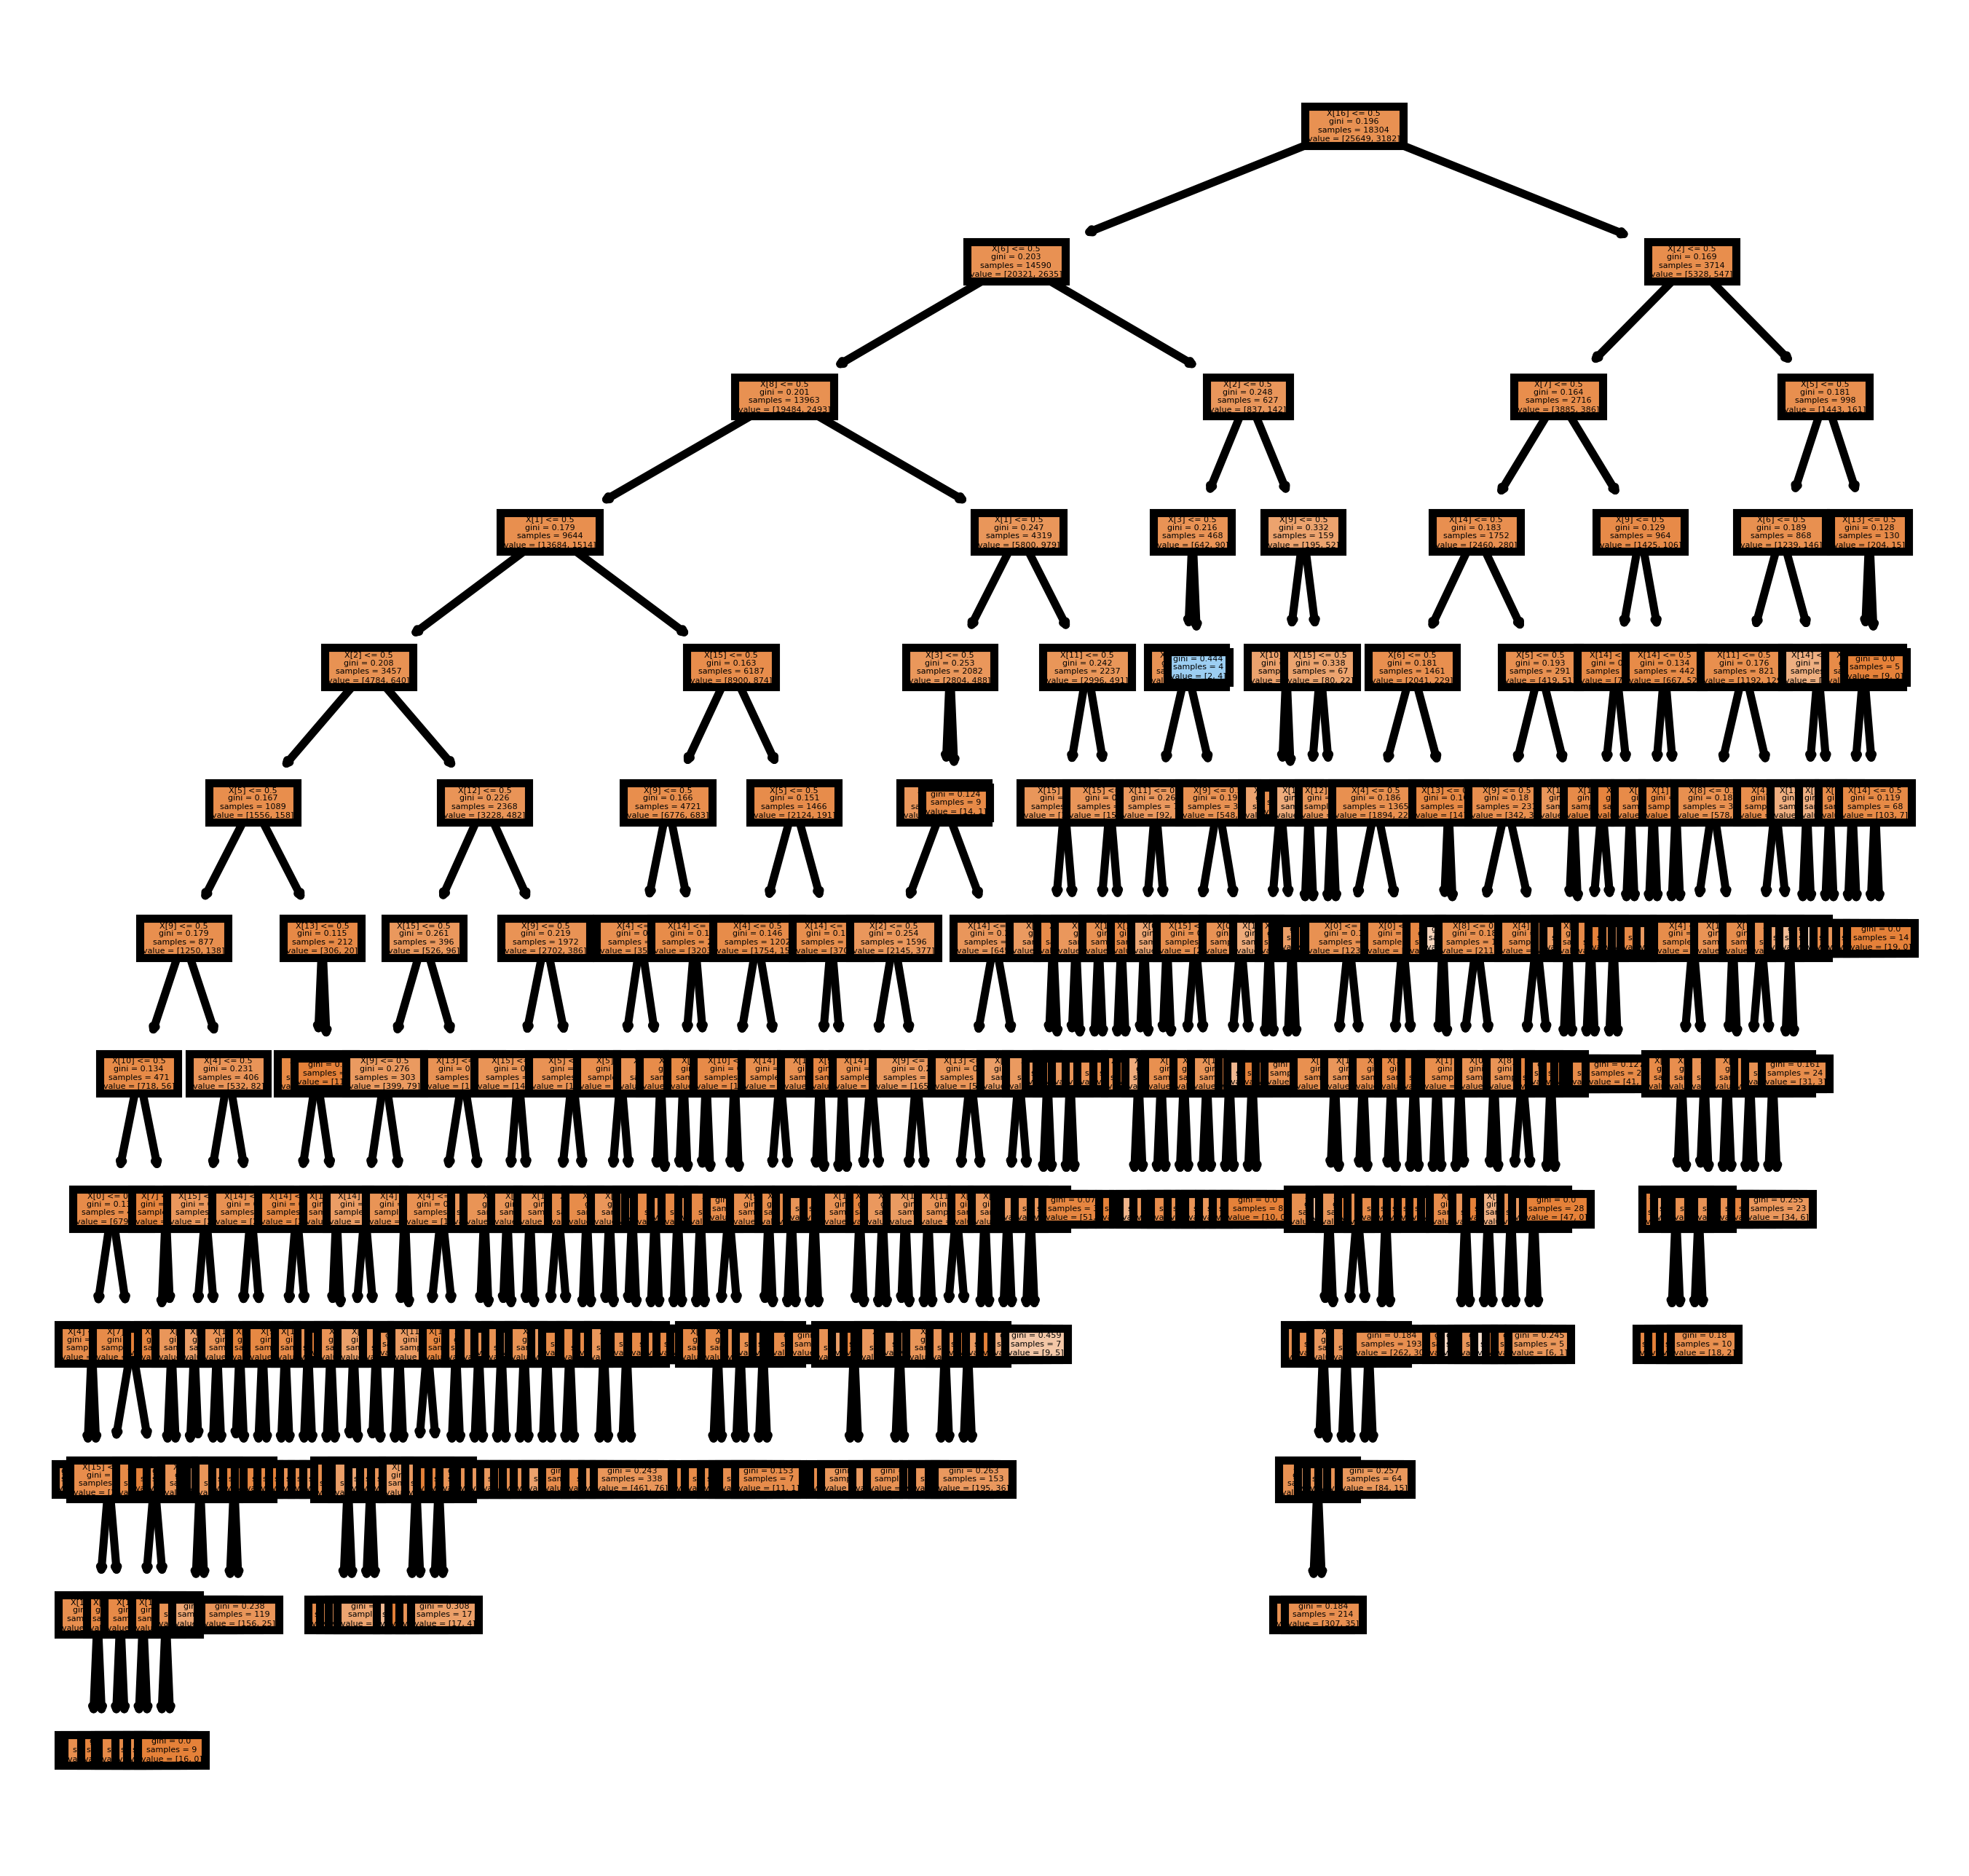

In [10]:
# [1] Import the necessary packages.
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

# [2] Plot the visualisation.
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 800)
tree.plot_tree(forest.estimators_[0], filled = True)

plt.show()

### 7. Check the accuracy of the model

In [12]:
# [1] Import the necessary package:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# [2] Print a report on the model's accuracy:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[10981     0]
 [ 1376     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10981
           1       0.00      0.00      0.00      1376

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357

0.88864611151574


### 8. Determine feature significance

Elapsed time to compute the importances: 0.026 seconds


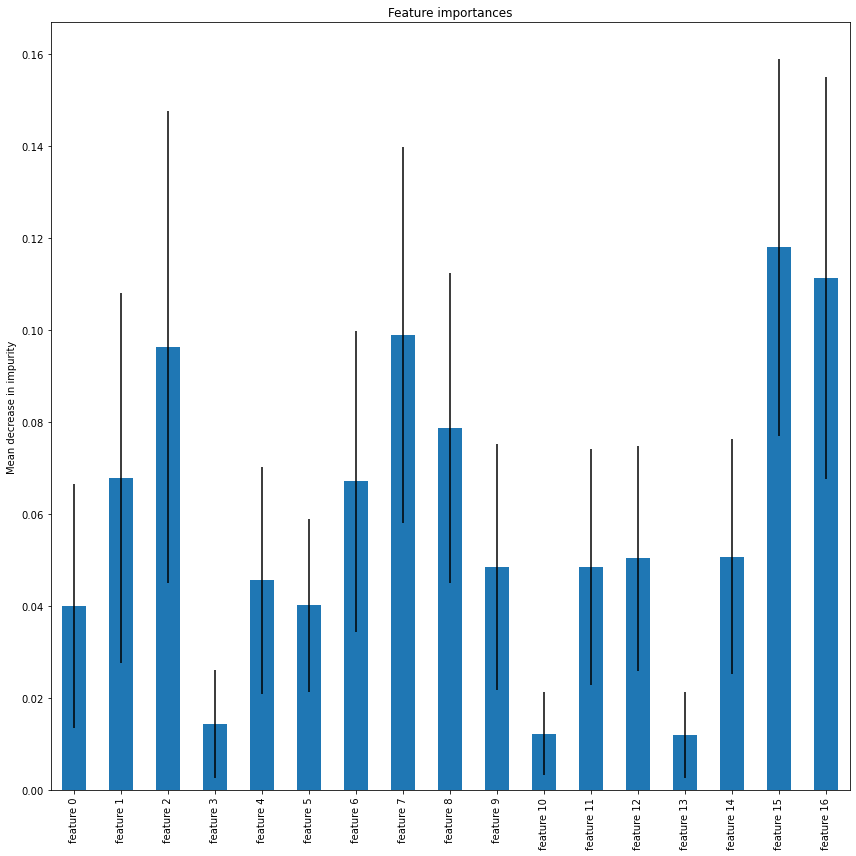

In [14]:
# [1] Import necessary packages:
import time
import numpy as np

# [2] Create a list of feature names:
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

# [3] Start measuring the time required to construct the random forest model:
start_time = time.time()
# Determine feature importance.
importances = forest.feature_importances_

# [4] Summarise the feature importance:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)

# [5] Calculate the elapsed time.
elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

# [6] Create a data strucure to store the importances:
forest_importances = pd.Series(importances, index = feature_names)

# [7] Construct a bar graph:
fig, ax = plt.subplots(figsize = (12, 12))
forest_importances.plot.bar(yerr = std, ax = ax)
# [7a] Set the title for the graph.
ax.set_title("Feature importances")
# [7b] Set the label for the y-axis.
ax.set_ylabel("Mean decrease in impurity")
# [7c] Adjust padding between and around subplots.
fig.tight_layout()

## Regression random forests

### 1. Import and read the data set

In [15]:
# [1] Import all necessary libraries:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
# Note: Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm  

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
# [1a] Filter out any warning messages.
warnings.filterwarnings("ignore")  

# [2] Read the provided CSV file/data set.
df = pd.read_csv("Ecommerce data.csv")  

# [3] Print a summary of the DataFrame to sense-check it.
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


### 2. Build and fit the model

In [16]:
# Prepare the data by indicating all the rows and columns for the RRF:
X = df.iloc[:, 0:11].values
y = df.iloc[:, 11].values

In [17]:
# [1] Import the 'train_test_split' package:
from sklearn.model_selection import train_test_split

# [2] Split the data set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                   random_state = 0)

# [3] Import the random forest regressor class:
from sklearn.ensemble import RandomForestRegressor

# [4] Create the regressor object:
regressor = RandomForestRegressor(n_estimators = 5,
                                 random_state = 0,
                                 n_jobs = 2)

# [5] Fit the 'regressor' to the data set.
regressor.fit(X_train, y_train)

# [6] Set 'y_pred'.
y_pred = regressor.predict(X_test)

### 3. Check the accuracy of the model

In [18]:
# Import the metrics package.
from sklearn import metrics

# [2] Calculate and display the metrics:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.653026315789474
Mean Squared Error: 20.422134210526313
Root Mean Squared Error: 4.519085550255308


# 

# 2.3 Clustering with Python

## K-means clustering

### 1. Prepare your workstation

In [1]:
# [1] Import libraries.
import pandas as pd
import numpy as np

# [2] Read the data file.
df_fb = pd.read_csv("FB.csv")

# [3] View the DataFrame.
print(df_fb.shape)
print(df_fb.dtypes)
df_fb.head()

(13397, 14)
fb_id         int64
medium       object
published    object
reactions     int64
comments      int64
share         int64
like          int64
love          int64
excellent     int64
funny         int64
sad           int64
angry         int64
yes           int64
no            int64
dtype: object


,fb_id,medium,published,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,12987653,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1,0
1,12987654,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0
2,12987655,photo,3/21/2017 0:24,33,9,1,33,0,0,0,0,0,0,1
3,12987656,photo,3/21/2017 0:23,72,1,0,72,0,0,0,0,0,0,1
4,12987657,photo,3/21/2017 0:13,174,0,0,173,1,0,0,0,0,0,1


### 2. Evaluate the variables

In [2]:
# Display a summary of the numeric variables.
df_fb.describe()

,fb_id,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
count,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,1.299435e+07,375.496007,187.822348,27.894379,364.123460,9.523475,0.999030,0.499515,0.259984,0.085318,0.518997,0.481003
std,3.867525e+03,615.082883,922.957579,106.823723,611.454156,31.672009,6.464646,3.002503,1.796688,0.706974,0.499658,0.499658
min,1.298765e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299100e+07,32.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.299435e+07,136.000000,7.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.299770e+07,351.000000,21.000000,3.000000,327.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.300105e+07,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000


### 3. Drop unneeded columns

In [3]:
# [1] Display the output and
# [2] return the length of the data structure with unique values:
print(len(df_fb['fb_id'].unique()))
print(len(df_fb['medium'].unique()))
print(len(df_fb['published'].unique()))

13397
4
4699


In [4]:
# [1] Employ the drop() function and
# [2] indicate the elements to drop:
df_fb.drop(['fb_id', 'published'], axis = 1, inplace = True)

# [3] Display the column names of the DataFrame.
df_fb.columns

Index(['medium', 'reactions', 'comments', 'share', 'like', 'love', 'excellent',
       'funny', 'sad', 'angry', 'yes', 'no'],
      dtype='object')

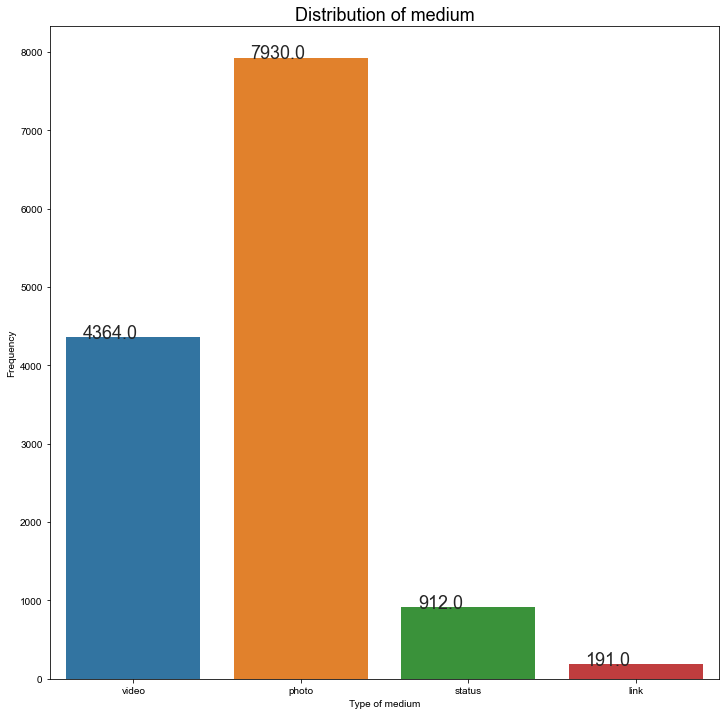

In [5]:
# [1] Import the necessary packages:
from matplotlib import pyplot as plt
import seaborn as sns

# [2] Generate the overall frame and [2a, b] the bars for the plot:
plt.figure(figsize = (12, 12))
ax = sns.countplot(x = 'medium', data = df_fb)
sns.set(font_scale = 1.5)
sns.set_style('white')

# [3] Specify the plot title, x-axis label, and the y-axis label:
plt.title('Distribution of medium')
plt.xlabel('Type of medium')
plt.ylabel('Frequency')

# [4] Annotate the bars with values:
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),
                (p.get_x() + 0.1, p.get_height() + 50), 
                va = 'center')

### 4. Specify the target variable

In [6]:
# Define the independent variable.
X = df_fb
# Define the dependent variable.
y = df_fb['medium']

In [7]:
# [1] Import the LbelEncoder class:
from sklearn.preprocessing import LabelEncoder

# [2] Create an object from the class.
le = LabelEncoder()

# [3] Modify the DataFrame column 'medium' with integer values:
X['medium'] = le.fit_transform(X['medium'])

y = le.transform(y)

In [8]:
# Check that label encoding happened correctly using the 'info()' method:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13397 entries, 0 to 13396
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   medium     13397 non-null  int32
 1   reactions  13397 non-null  int64
 2   comments   13397 non-null  int64
 3   share      13397 non-null  int64
 4   like       13397 non-null  int64
 5   love       13397 non-null  int64
 6   excellent  13397 non-null  int64
 7   funny      13397 non-null  int64
 8   sad        13397 non-null  int64
 9   angry      13397 non-null  int64
 10  yes        13397 non-null  int64
 11  no         13397 non-null  int64
dtypes: int32(1), int64(11)
memory usage: 1.2 MB


In [9]:
# Check that label happened correcly using the 'head()' method.
X.head()

,medium,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,3,529,512,262,432,92,3,1,1,0,1,0
1,1,150,0,0,150,0,0,0,0,0,1,0
2,1,33,9,1,33,0,0,0,0,0,0,1
3,1,72,1,0,72,0,0,0,0,0,0,1
4,1,174,0,0,173,1,0,0,0,0,0,1


### 5. Normalise the data set

In [10]:
# [1] Create an list with the columns labels from X:
x_cols = X.columns

# [2] Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler

# [3] Create the object from 'MinMaxScaler'.
ms = MinMaxScaler()

# [4] Modify X to scale values between 0 and 1.
X = ms.fit_transform(X)

# [5] Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns = [x_cols])

# [6] Check the contents of the modifiend DataFrame.
X.head()

,medium,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.0,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,0.333333,0.007006,0.000429,0.000292,0.007006,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
3,0.333333,0.015287,0.000048,0.000000,0.015287,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
4,0.333333,0.036943,0.000000,0.000000,0.036730,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0


### 6. Apply the clustering algorithm

In [11]:
# [1] Import the KMeans class.
from sklearn.cluster import KMeans

# [2] Create the object and [2a] specify the parameters:
kmeans = KMeans(n_clusters = 2, random_state = 0)

# [3] Fir the k-means to the data set.
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [12]:
# Indicate 'kmeans()' applies to 'cluster_centers'.
kmeans.cluster_centers_

array([[ 5.63676805e-01,  7.97700522e-02,  9.95437217e-03,
         8.62467332e-03,  7.72335167e-02,  1.53255728e-02,
         3.47878122e-03,  3.54252413e-03,  5.34012488e-03,
         2.56302437e-03,  4.55191440e-15,  1.00000000e+00],
       [ 5.72846253e-01,  7.96796690e-02,  8.01565154e-03,
         7.70376130e-03,  7.73781682e-02,  1.37259937e-02,
         3.70007460e-03,  2.84714200e-03,  4.87305522e-03,
         2.92749011e-03,  1.00000000e+00, -4.66293670e-15]])

In [13]:
# Check the inertia for the data set.
kmeans.inertia_

1881.3383018237319

### 7. Evaluate the output

In [14]:
# [1] Extract the labels from the k-means.
labels = kmeans.labels_

# [2] Add up correctly labelled instances.
correct_labels = sum(y == labels)

# [3] Display the output.
print('Result: %d out of %d samples were correctly labelled.' % (correct_labels,
                                                                y.size))

Result: 4157 out of 13397 samples were correctly labelled.


### 8. Improve the accuracy (elbow method)

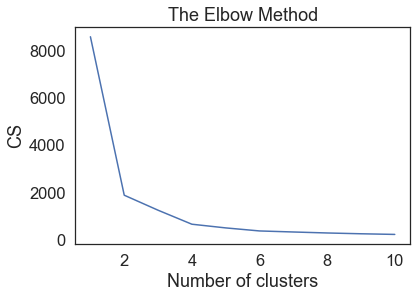

In [15]:
# [1] Create an empty list.
cs = []

# [2] Employ a loop to test cluster sizes:
for i in range(1, 11):
    # [3a] Create object k-means.
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 100,
                   random_state = 0)
    # [3b] Apply the fit() method.
    kmeans.fit(X)
    # [3c] Add the inertia value.
    cs.append(kmeans.inertia_)

# [4] Create a plot.
plt.plot(range(1, 11), cs)
# [4a] Speciy the title, x-axis label and y-axis label.
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')

# [5] Display the plot.
plt.show()

# From the elbow method we can take the optimal number as 4.

In [17]:
# [1] Create a k-means object with three cluster:
kmeans = KMeans(n_clusters = 3, random_state = 0)

# [2] Apply 'fit()', using the DataFrame, to the k-means object.
kmeans.fit(X)

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print('Result: %d out of %d samples were correctly labelled.' % (correct_labels,
                                                                y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels / float(y.size)))

Result: 4665 out of 13397 samples were correctly labelled.
Accuracy score: 0.35


In [20]:
# [1] Create a k-means object with four clusters:
kmeans = KMeans(n_clusters = 4, random_state = 0)

# [2] Apply 'fit()', using the DataFrame, to the k-means object.
kmeans.fit(X)

# [3] Check how many of the samples were corectly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print('Result: %d out of %d samples were correctly labelled.' % (correct_labels,
                                                                y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels / float(y.size)))

Result: 6545 out of 13397 samples were correctly labelled.
Accuracy score: 0.49


### 9. Visualise the clusters

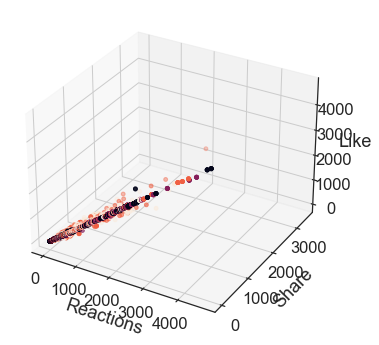

In [21]:
# [1] Create the figure area.
fig = plt.figure(figsize = (26, 6))

# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection = '3d')

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['reactions'], df_fb['share'], df_fb['like'],
          c = labels, s = 15)

# [4] Set the label for each dimension:
ax.set_xlabel('Reactions')
ax.set_ylabel('Share')
ax.set_zlabel('Like')

# [5] Show the plot.
plt.show()

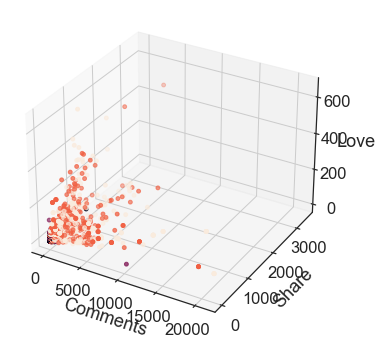

In [22]:
# [1] Create the figure area.
fig = plt.figure(figsize = (26, 6))

# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection = '3d')

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['comments'], df_fb['share'], df_fb['love'],
          c = labels, s = 15)

# [4] Set the label for each dimension:
ax.set_xlabel('Comments')
ax.set_ylabel('Share')
ax.set_zlabel('Love')

# [5] Show the plot.
plt.show()